## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
import tensorflow as tf

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpu_devices[0], True)

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import Dropout
"""
建立神經網路，並加入 dropout layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):    
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 5e-4
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.0, 0.3, 0.5, 0.8]
layers = {"3-layers" : [512, 256, 128], "6-layers" : [512, 256, 256, 128, 128, 128]}


In [7]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for droprate, nlayer in itertools.product(Dropout_EXP, layers.keys()):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with droprate = %f, %s" % (droprate, nlayer))
    model = build_mlp(input_shape=x_train.shape[1:], num_neurons=layers[nlayer], drp_ratio=droprate)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    exp_name_tag = "exp-dr-%s-%s" % (str(droprate), nlayer)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with droprate = 0.000000, 3-layers
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dr

50000/50000 [==============================] - 4s 82us/step - loss: 0.6365 - accuracy: 0.7761 - val_loss: 1.6442 - val_accuracy: 0.5249
Epoch 47/50
50000/50000 [==============================] - 4s 88us/step - loss: 0.6403 - accuracy: 0.7726 - val_loss: 1.6112 - val_accuracy: 0.5323
Epoch 48/50
50000/50000 [==============================] - 4s 86us/step - loss: 0.6182 - accuracy: 0.7821 - val_loss: 1.6662 - val_accuracy: 0.5273
Epoch 49/50
50000/50000 [==============================] - 5s 92us/step - loss: 0.5903 - accuracy: 0.7936 - val_loss: 1.7044 - val_accuracy: 0.5193
Epoch 50/50
50000/50000 [==============================] - 5s 96us/step - loss: 0.5968 - accuracy: 0.7905 - val_loss: 1.6783 - val_accuracy: 0.5255
Experiment with droprate = 0.000000, 6-layers
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
___________

Epoch 36/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.6896 - accuracy: 0.7519 - val_loss: 1.6391 - val_accuracy: 0.5252
Epoch 37/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.6565 - accuracy: 0.7658 - val_loss: 1.6706 - val_accuracy: 0.5250
Epoch 38/50
50000/50000 [==============================] - 4s 78us/step - loss: 0.6465 - accuracy: 0.7690 - val_loss: 1.7305 - val_accuracy: 0.5226
Epoch 39/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.6220 - accuracy: 0.7780 - val_loss: 1.7236 - val_accuracy: 0.5227
Epoch 40/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.6023 - accuracy: 0.7855 - val_loss: 1.8493 - val_accuracy: 0.5145
Epoch 41/50
50000/50000 [==============================] - 4s 80us/step - loss: 0.5752 - accuracy: 0.7938 - val_loss: 1.8739 - val_accuracy: 0.5178
Epoch 42/50
50000/50000 [==============================] - 4s 81us/step - loss: 0.5729 - accuracy: 0.7965 - val_

50000/50000 [==============================] - 4s 88us/step - loss: 1.5315 - accuracy: 0.4509 - val_loss: 1.4662 - val_accuracy: 0.4871
Epoch 32/50
50000/50000 [==============================] - 4s 88us/step - loss: 1.5239 - accuracy: 0.4510 - val_loss: 1.4836 - val_accuracy: 0.4715
Epoch 33/50
50000/50000 [==============================] - 4s 86us/step - loss: 1.5250 - accuracy: 0.4509 - val_loss: 1.4497 - val_accuracy: 0.4842
Epoch 34/50
50000/50000 [==============================] - 4s 84us/step - loss: 1.5167 - accuracy: 0.4561 - val_loss: 1.4645 - val_accuracy: 0.4790
Epoch 35/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5116 - accuracy: 0.4565 - val_loss: 1.4528 - val_accuracy: 0.4837
Epoch 36/50
50000/50000 [==============================] - 4s 82us/step - loss: 1.5059 - accuracy: 0.4607 - val_loss: 1.4577 - val_accuracy: 0.4874
Epoch 37/50
50000/50000 [==============================] - 4s 83us/step - loss: 1.5061 - accuracy: 0.4580 - val_loss: 1.4455

Epoch 21/50
50000/50000 [==============================] - 5s 93us/step - loss: 1.7673 - accuracy: 0.3561 - val_loss: 1.7460 - val_accuracy: 0.3798
Epoch 22/50
50000/50000 [==============================] - 5s 96us/step - loss: 1.7627 - accuracy: 0.3557 - val_loss: 1.7302 - val_accuracy: 0.3884
Epoch 23/50
50000/50000 [==============================] - 5s 99us/step - loss: 1.7556 - accuracy: 0.3572 - val_loss: 1.7388 - val_accuracy: 0.3837
Epoch 24/50
50000/50000 [==============================] - 6s 112us/step - loss: 1.7493 - accuracy: 0.3636 - val_loss: 1.6770 - val_accuracy: 0.4076
Epoch 25/50
50000/50000 [==============================] - 6s 119us/step - loss: 1.7482 - accuracy: 0.3619 - val_loss: 1.6930 - val_accuracy: 0.4021
Epoch 26/50
50000/50000 [==============================] - 7s 133us/step - loss: 1.7414 - accuracy: 0.3684 - val_loss: 1.6977 - val_accuracy: 0.4045
Epoch 27/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.7399 - accuracy: 0.3677 - 

50000/50000 [==============================] - 4s 76us/step - loss: 1.8708 - accuracy: 0.3057 - val_loss: 1.8618 - val_accuracy: 0.3539
Epoch 17/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8641 - accuracy: 0.3102 - val_loss: 1.8505 - val_accuracy: 0.3631
Epoch 18/50
50000/50000 [==============================] - 4s 75us/step - loss: 1.8647 - accuracy: 0.3108 - val_loss: 1.8391 - val_accuracy: 0.3568
Epoch 19/50
50000/50000 [==============================] - 4s 74us/step - loss: 1.8588 - accuracy: 0.3101 - val_loss: 1.8340 - val_accuracy: 0.3552
Epoch 20/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8637 - accuracy: 0.3110 - val_loss: 1.8515 - val_accuracy: 0.3592
Epoch 21/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8543 - accuracy: 0.3150 - val_loss: 1.8484 - val_accuracy: 0.3596
Epoch 22/50
50000/50000 [==============================] - 4s 73us/step - loss: 1.8492 - accuracy: 0.3188 - val_loss: 1.8336

Epoch 6/50
50000/50000 [==============================] - 6s 119us/step - loss: 2.1061 - accuracy: 0.1744 - val_loss: 2.2392 - val_accuracy: 0.1320
Epoch 7/50
50000/50000 [==============================] - 6s 112us/step - loss: 2.0902 - accuracy: 0.1790 - val_loss: 2.2784 - val_accuracy: 0.1183
Epoch 8/50
50000/50000 [==============================] - 6s 125us/step - loss: 2.0944 - accuracy: 0.1811 - val_loss: 2.2578 - val_accuracy: 0.1258
Epoch 9/50
50000/50000 [==============================] - 7s 141us/step - loss: 2.0915 - accuracy: 0.1816 - val_loss: 2.2412 - val_accuracy: 0.1287
Epoch 10/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.0837 - accuracy: 0.1888 - val_loss: 2.2280 - val_accuracy: 0.1355
Epoch 11/50
50000/50000 [==============================] - 7s 147us/step - loss: 2.0727 - accuracy: 0.1961 - val_loss: 2.2144 - val_accuracy: 0.1537
Epoch 12/50
50000/50000 [==============================] - 7s 146us/step - loss: 2.0695 - accuracy: 0.1975 - v

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 155us/step - loss: 2.3852 - accuracy: 0.0991 - val_loss: 2.3026 - val_accuracy: 0.0997
Epoch 2/50
50000/50000 [==============================] - 6s 126us/step - loss: 2.3028 - accuracy: 0.0983 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 3/50
50000/50000 [==============================] - 6s 115us/step - loss: 2.3028 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 103us/step - loss: 2.3027 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 5s 100us/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1001
Epoch 6/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3026 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.0999
Epoch 7/50
50000/50000 [==============================] - 5s 91

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 104us/step - loss: 2.7820 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/50
50000/50000 [==============================] - 5s 93us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3027 - accuracy: 0.0992 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/50
50000/50000 [==============================] - 5s 92us/step - loss: 2.3026 - accuracy: 0.0976 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
50000/50000 [==============================] - 4s 88us/step - loss: 2.3027 - accuracy: 0.0978 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 4s 87us/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 4s 86us/s

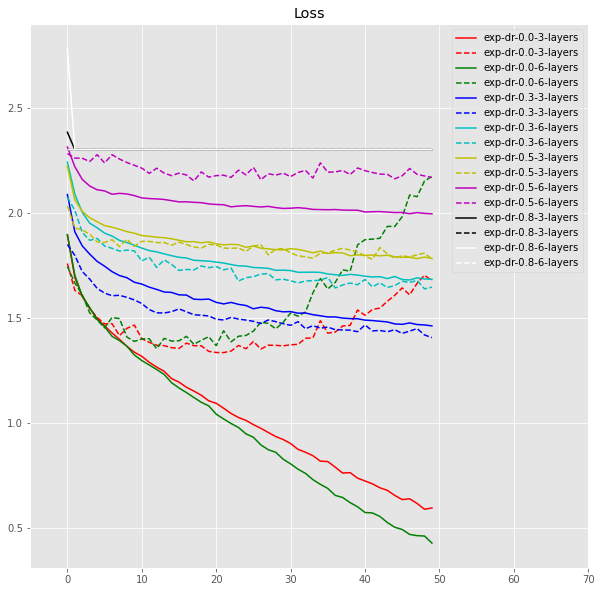

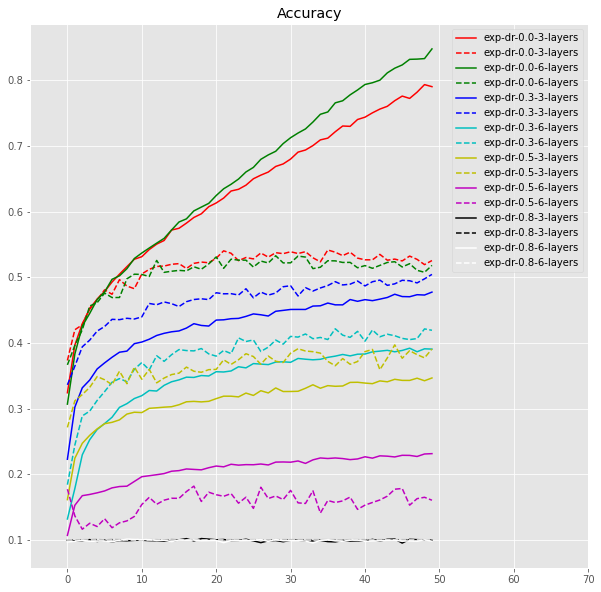

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
plt.style.use('ggplot')
    
# NUM_COLORS = len(results.keys())
# cm = plt.get_cmap('gist_rainbow')
# color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]
color_bar = ["r", "g", "b", "c", "y", "m", "k", "w"]

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.xlim(-5,70)
#plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.xlim((-5,70))
plt.legend()
plt.show()